### Question 1: Wine classification (50)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


1. Split the data into training and testing(20%). Scale the data. 

In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)

# Scale the training and testing data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

2. Fit a SVM model, using the type of wine as the target value, and Alcohol	and Malicacid as the features. Report the classification accuracy. 

In [3]:
# Select only the "Alcohol" and "Malicacid" columns as features
X = X[['Alcohol', 'Malicacid']]
y = wine.data.targets

# Create an SVM classifier
svm_classifier = SVC(kernel = "linear")

# Train the classifier on the training data
svm_classifier.fit(X, y)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X)

# Calculate the accuracy of the classifier
print(accuracy_score(y, y_pred))

0.7808988764044944


/Users/matthewxue/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Select only the "Alcohol" and "Malicacid" columns as features
X_selected = X[['Alcohol', 'Malicacid']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, 
                                                    random_state=4400)

# Scale the training and testing data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel = "linear")

# Train the classifier on the scaled training data
svm_classifier.fit(X_train_scaled, y_train)
y_pred_scaled = svm_classifier.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(accuracy_scaled)

0.8611111111111112


In [5]:
X

,Alcohol,Malicacid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


3. Visualize the result from previous question. 

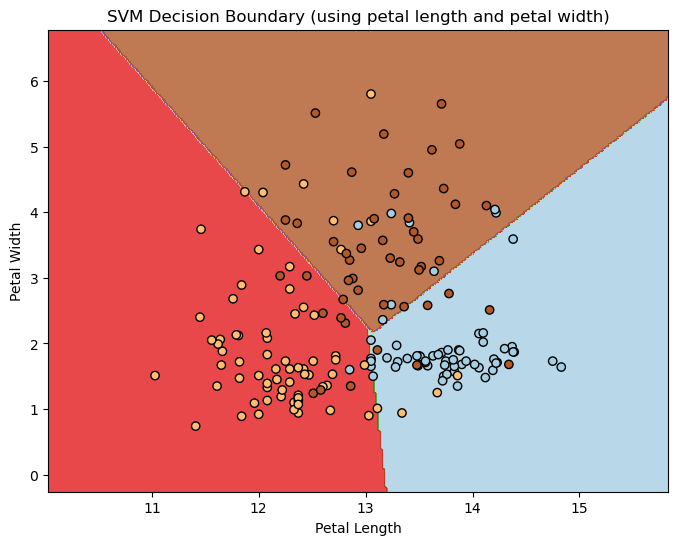

In [6]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.svm import SVC

# turn the X and y datapoints into numpy arrays
X = wine.data.features[['Alcohol', 'Malicacid']].values
X = wine.data.features[['Alcohol', 'Malicacid']].to_numpy()
y = wine.data.targets.values
y = wine.data.targets.to_numpy()

# Fit SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Create a meshgrid of points to make predictions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('SVM Decision Boundary (using petal length and petal width)')
plt.show()

4. Fit the SVM model, using all features and type of wines as the target value. Divide the training data into training and validation. Use the validation part to tune the parameter of kernel type and the value of C and then the training part to fit the model. Report the classification report table on test data, as well as the best parameters. 

In [7]:
from sklearn.model_selection import GridSearchCV

X = wine.data.features 
y = wine.data.targets 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=4400)

# Scale the training and testing data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10]
}

# Perform grid search cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

{'C': 0.1, 'kernel': 'linear'}
Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 1.0


5. Now, use the Alcohol as the target and all the other features as the features. Fit a SVM and report the metrics. (No need to tune the parameters)

### Question 2: Explain the concepts (20)

1. Explain what is margin and support vector in the SVM (5)

Definition of Margin: SVR is a variant of SVM that is used for regression tasks and SVR defines an ε-insensitive tube around the target values. If there are any predictions that fall within the ε-insensitive tube, then the prediction is considered accurate and it will not contribute to the loss function. Predictions that land outside this tub will be considered an error and it will contribute to the loss funtion. 

Definition of Support Vectors: SVR has the ability to identify data points that lie on or near the margin, which are called the support vectors. The support vectors have a major impact on determining the ε-insensitive tube and the regression function.

2. Explain the difference and similarity between SVC and SVR (10)

3. Explain the difference of the definition of error in SVR and linear regression (5)

### Question 3:  KNN with regression (30)

Following is a simulation data with three features. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

1. Fit a KNN model. Tune the parameter of K and distance metric (Euclidean and Manhattan). Print the MSE with the best parameter. (15) 

In [22]:
# Define the parameter grid for tuning

param_grid = {'n_neighbors': range(1, 21), 
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print(best_params)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param)
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(mse)

{'metric': 'euclidean', 'n_neighbors': 5}
652.1642782709176


In [23]:
# Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print(best_params)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param)
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(mse)

{'metric': 'euclidean', 'n_neighbors': 5}
724.5780434114346


2. Repeat the simulation process with the number of feature equal to 10. Redo the previous question. (15)

In [24]:
# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

In [26]:
# Define the parameter grid for tuning

param_grid = {'n_neighbors': range(1, 21), 
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print(best_params)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param)
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(mse)

{'metric': 'euclidean', 'n_neighbors': 6}
8875.817618261119


In [27]:
# Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
             'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_model = KNeighborsRegressor()
grid_search = GridSearchCV(knn_model, param_grid, cv = 5, 
                           scoring = "neg_mean_squared_error")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = grid_search.best_params_
print(best_params)

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(n_neighbors = best_param)
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print(mse)

{'metric': 'euclidean', 'n_neighbors': 5}
9125.760810538313
